Weighted Pre-Treatment Speed: 17.82 mph
Weighted Post-Treatment Speed: 16.71 mph
T-Statistic: 22.543, P-Value: 0.000


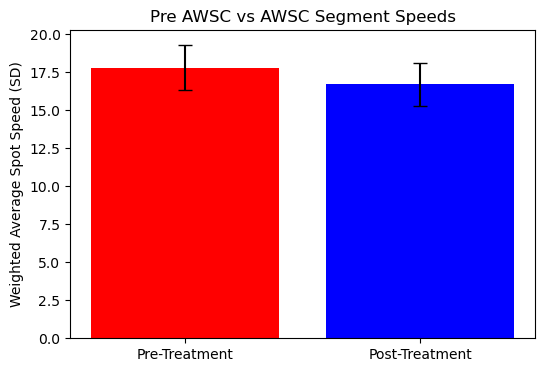

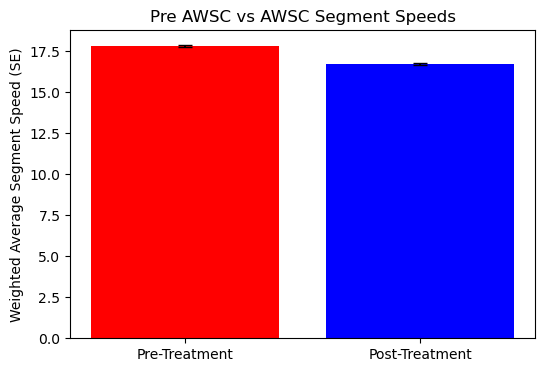

       pre_speeds  post_speeds
count  796.000000   839.000000
mean    17.841709    16.562574
std      1.776172     1.501179
min     12.000000    11.000000
25%     17.000000    15.000000
50%     18.000000    16.000000
75%     19.000000    18.000000
max     31.000000    20.000000
Weighted Pre-Treatment 85th Speed Percentile: 21.36 mph
Weighted Post-Treatment 85th Speed Percentile: 20.18 mph
Weighted Pre-Treatment 95th Speed Percentile: 24.67 mph
Weighted Post-Treatment 95th Speed Percentile: 23.54 mph
Highest value for pre-treatment'85th Speed Percentile': 35.0 mph Highest value for post-treatment'85th Speed Percentile': 43.0 mph
Data Periods                                             Jun 01, 2020 - Jun 01, 2021
Mode of Travel                                All Vehicles - StL All Vehicles Volume
Zone ID                                                                          NaN
Zone Name                                              Oakdale Avenue / 13426687 / 4
Line Zone Length (Miles)

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
698,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-01,4: Thursday (Th-Th),...,22.0,8.0,28.869,0.751,7.03,0.08,15.0,17.0,27.0,35.0
1004,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-04,7: Sunday (Su-Su),...,21.0,9.0,25.868,0.807,3.64,0.03,15.0,16.0,27.0,29.0
701,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-01,4: Thursday (Th-Th),...,18.0,10.0,28.869,0.627,3.76,0.08,6.0,7.0,26.0,32.0
699,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-01,4: Thursday (Th-Th),...,20.0,9.0,28.869,0.708,10.98,0.16,10.0,16.0,26.0,30.0
134,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2020-07,6: Saturday (Sa-Sa),...,20.0,9.0,23.146,0.867,4.76,0.03,5.0,8.0,26.0,36.0
812,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-02,7: Sunday (Su-Su),...,21.0,8.0,21.536,0.996,3.03,0.00,12.0,14.0,26.0,75.0
815,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-02,7: Sunday (Su-Su),...,19.0,9.0,21.536,0.888,3.99,0.02,13.0,14.0,26.0,28.0
779,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-02,1: Monday (M-M),...,21.0,9.0,21.536,0.957,4.82,0.01,13.0,17.0,26.0,31.0
890,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-03,4: Thursday (Th-Th),...,21.0,9.0,24.595,0.862,6.66,0.04,15.0,17.0,26.0,30.0
998,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-04,6: Saturday (Sa-Sa),...,20.0,9.0,25.868,0.757,5.33,0.07,10.0,15.0,25.0,28.0


In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data/seg_pre.csv')
post_treatment = pd.read_csv('data/seg_post.csv')


pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

pre_speeds = pre_treatment['Avg Segment Speed (mph)']
post_speeds = post_treatment['Avg Segment Speed (mph)']
pre_volume = pre_treatment['Average Daily Segment Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Segment Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Pre AWSC vs AWSC Segment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Segment Speed (SE)')
plt.title('Pre AWSC vs AWSC Segment Speeds')
plt.show()

df = pd.DataFrame({'pre_speeds': pre_speeds, 
                   'post_speeds': post_speeds})
summary_table = df.describe()
print(summary_table)


pre_weighted_85th_speed = (pre_treatment['85th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_85th_speed = (post_treatment['85th Speed Percentile'] * post_volume).sum() / post_volume.sum()

pre_weighted_95th_speed = (pre_treatment['95th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_95th_speed = (post_treatment['95th Speed Percentile'] * post_volume).sum() / post_volume.sum()

print(f"Weighted Pre-Treatment 85th Speed Percentile: {pre_weighted_85th_speed:.2f} mph")
print(f"Weighted Post-Treatment 85th Speed Percentile: {post_weighted_85th_speed:.2f} mph")
print(f"Weighted Pre-Treatment 95th Speed Percentile: {pre_weighted_95th_speed:.2f} mph")
print(f"Weighted Post-Treatment 95th Speed Percentile: {post_weighted_95th_speed:.2f} mph")

max_85th_speed_row_pre = pre_treatment.loc[pre_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment.loc[post_treatment['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['95th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['95th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('85th Speed Percentile', ascending = False).head(10)
top_speed


Weighted Pre-Treatment 85th Speed Percentile: 21.36 mph
Weighted Post-Treatment 85th Speed Percentile: 20.18 mph
Weighted Pre-Treatment 95th Speed Percentile: 24.67 mph
Weighted Post-Treatment 95th Speed Percentile: 23.54 mph
Highest value for pre-treatment'85th Speed Percentile': 35.0 mph Highest value for post-treatment'85th Speed Percentile': 43.0 mph
Data Periods                                             Jun 01, 2020 - Jun 01, 2021
Mode of Travel                                All Vehicles - StL All Vehicles Volume
Zone ID                                                                          NaN
Zone Name                                              Oakdale Avenue / 13426687 / 4
Line Zone Length (Miles)                                                        0.05
Zone Is Pass-Through                                                             yes
Zone Direction (degrees)                                                           0
Zone is Bi-Direction                            

,Data Periods,Mode of Travel,Zone ID,Zone Name,Line Zone Length (Miles),Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,...,Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Free Flow Factor,Vehicle Miles of Travel (StL Volume),Vehicle Hours of Delay (StL Volume),5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
698,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-01,4: Thursday (Th-Th),...,22.0,8.0,28.869,0.751,7.03,0.08,15.0,17.0,27.0,35.0
1004,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-04,7: Sunday (Su-Su),...,21.0,9.0,25.868,0.807,3.64,0.03,15.0,16.0,27.0,29.0
701,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-01,4: Thursday (Th-Th),...,18.0,10.0,28.869,0.627,3.76,0.08,6.0,7.0,26.0,32.0
699,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-01,4: Thursday (Th-Th),...,20.0,9.0,28.869,0.708,10.98,0.16,10.0,16.0,26.0,30.0
134,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2020-07,6: Saturday (Sa-Sa),...,20.0,9.0,23.146,0.867,4.76,0.03,5.0,8.0,26.0,36.0
812,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-02,7: Sunday (Su-Su),...,21.0,8.0,21.536,0.996,3.03,0.00,12.0,14.0,26.0,75.0
815,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-02,7: Sunday (Su-Su),...,19.0,9.0,21.536,0.888,3.99,0.02,13.0,14.0,26.0,28.0
779,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-02,1: Monday (M-M),...,21.0,9.0,21.536,0.957,4.82,0.01,13.0,17.0,26.0,31.0
890,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-03,4: Thursday (Th-Th),...,21.0,9.0,24.595,0.862,6.66,0.04,15.0,17.0,26.0,30.0
998,"Jun 01, 2020 - Jun 01, 2021",All Vehicles - StL All Vehicles Volume,NaN,Oakdale Avenue / 13426687 / 4,0.05,yes,0,yes,2021-04,6: Saturday (Sa-Sa),...,20.0,9.0,25.868,0.757,5.33,0.07,10.0,15.0,25.0,28.0


In [10]:
filtered_pre = pre_treatment[pre_treatment['Day Type'] != '0: All Days (M-Su)']
filtered_post = post_treatment[post_treatment['Day Type'] != '0: All Days (M-Su)']

total_pre_volume = filtered_pre['Average Daily Segment Traffic (StL Volume)'].sum()
total_post_volume = filtered_post['Average Daily Segment Traffic (StL Volume)'].sum()

total_combined_volume = total_pre_volume + total_post_volume

print(f"Total Pre-Treatment Volume: {total_pre_volume:,.0f}")
print(f"Total Post-Treatment Volume: {total_post_volume:,.0f}")
print(f"Combined Volume (Pre + Post): {total_combined_volume:,.0f}")

Total Pre-Treatment Volume: 138,467
Total Post-Treatment Volume: 96,953
Combined Volume (Pre + Post): 235,420


In [12]:
results = {
    'Intersection': 'Superior and Oakdale Ave',
 'Pre_Mean': float(pre_weighted_speed),
    'Post_Mean': float(post_weighted_speed),
    'Pre_Std': float(pre_weighted_std),
    'Post_Std': float(post_weighted_std),
    'Pre_SE': float(pre_weighted_se),
    'Post_SE': float(post_weighted_se),
    'Pre_85th': float(pre_weighted_85th_speed),
    'Post_85th': float(post_weighted_85th_speed),
    'Pre_95th': float(pre_weighted_95th_speed),
    'Post_95th': float(post_weighted_95th_speed),
    'Pre_Max_85th': float(max_85th_speed_value_pre),
    'Post_Max_85th': float(max_85th_speed_value_post),
    'T_Statistic': float(t_stat),
    'P_Value': float(p_value),
    'Pre_Volume': int(total_pre_volume),
    'Post_Volume': int(total_post_volume),
    'Combined Volume': int(total_combined_volume),
    'Pre_Treatment_Volume': int(total_pre_volume),
    'Post_Treatment_Volume': int(total_post_volume),
    'Combined_Volumne': int(total_combined_volume)
}


import json
with open('../results/Superior and Oakdale Ave_summary.json', 'w') as f:
    json.dump(results, f)

In [18]:
import os
import json
import pandas as pd

# Directory containing summary files
summary_dir = '../results'

# List to hold each result
data = []

# Loop through files in directory
for filename in os.listdir(summary_dir):
    if filename.endswith('_summary.json'):
        with open(os.path.join(summary_dir, filename), 'r') as f:
            summary = json.load(f)

            data.append({
                'Intersection': summary.get('Intersection', filename.replace('_summary.json', '')),
                'T_Statistic': summary.get('T_Statistic'),
                'P_Value': summary.get('P_Value'),
                'Pre_Volume': summary.get('Pre_Volume'),
                'Post_Volume': summary.get('Post_Volume'),
                'Combined_Volume': (
                    summary.get('Combined Volume') or 
                    summary.get('Combined_Volume') or 
                    summary.get('Combined_Volumne')  # to handle the typo
                )
            })

# Convert to DataFrame
df = pd.DataFrame(data)

# Save or print
print(df)
# df.to_csv('summary_stats.csv', index=False)


                 Intersection  T_Statistic        P_Value  Pre_Volume  \
0             Vernon & 5th St    12.345770   1.292860e-27       43357   
1             Menlo & 43rd St   -11.578020   6.663356e-25       48930   
2     Romaine St & St Andrews     1.983873   4.759546e-02      315139   
3           Hoover & 110th Pl    41.802335  1.419422e-151      415715   
4          Orhpis & Kelton St   -51.675679  7.046586e-184      127977   
5     Clinton & Seirra Bonita     9.157614   1.829121e-19      430649   
6            77th & Standford    22.543412   2.271650e-87      138467   
7               Reno & 2nd St   -43.541710  1.744889e-217      366433   
8   Yosemite Dr to Vincent St   214.478652   0.000000e+00     5797238   
9          Euclid & Oregon St    40.698748  5.776558e-147      365803   
10   Superior and Oakdale Ave    22.543412   2.271650e-87      138467   

    Post_Volume  Combined_Volume  
0         49779            93136  
1         61063           109993  
2        271040   

In [16]:
ls

Oakdale.ipynb  data/
